In [12]:
# Import the dependencies.
%pip install citypy
from citipy import citipy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement citypy
ERROR: No matching distribution found for citypy


In [13]:
#declare each array as a variable
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [14]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [15]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [17]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

longyearbyen sj
port alfred za
bredasdorp za
olafsvik is
illoqqortoormiut gl
warqla dz
ushuaia ar
ushuaia ar
illoqqortoormiut gl
ribeira grande pt
port alfred za
amderma ru
mahebourg mu
punta arenas cl
henties bay na
uyskoye ru
tasiilaq gl
attawapiskat ca
bredasdorp za
sergeyevka kz
petropavlivka ua
bubaque gw
jamestown sh
washim in
upernavik gl
shache cn
biltine td
ushuaia ar
chuy uy
pisco pe
la palma pa
kangaatsiaq gl
amderma ru
matara lk
ambilobe mg
koulamoutou ga
iquique cl
busselton au
ushuaia ar
victoria sc
tasiilaq gl
ushuaia ar
taolanaro mg
ushuaia ar
hamilton bm
krasnoselkup ru
hareid no
axim gh
goderich sl
jablonne nad orlici cz
mar del plata ar
port alfred za
port elizabeth za
clyde river ca
ushuaia ar
lerwick gb
san rafael ar
sobral br
barentsburg sj
cayenne gf
illoqqortoormiut gl
ushuaia ar
vila velha br
geraldton ca
upernavik gl
iqaluit ca
eskil tr
slonim by
cape town za
cape town za
port alfred za
barentsburg sj
tir pol af
porbandar in
aswan eg
chuy uy
segezha ru
cape to

ushuaia ar
qaanaaq gl
barentsburg sj
namibe ao
mocajuba br
port alfred za
marawi sd
werda bw
iskateley ru
pitimbu br
port alfred za
ponta do sol cv
jamestown sh
monteagudo bo
rawson ar
torbay ca
ushuaia ar
clyde river ca
saint-philippe re
ushuaia ar
taolanaro mg
hermanus za
nouadhibou mr
busselton au
saint-philippe re
torbay ca
grand river south east mu
makat kz
east london za
ushuaia ar
booue ga
bambous virieux mu
toliary mg
dikson ru
hermanus za
taolanaro mg
dikson ru
ushuaia ar
chebenki ru
ushuaia ar
basyanovskiy ru
cape town za
norilsk ru
malanje ao
miranorte br
illoqqortoormiut gl
jamestown sh
los llanos de aridane es
dingle ie
arrecife es
vila velha br
carnarvon au
vestmannaeyjar is
mar del plata ar
taolanaro mg
port alfred za
acarau br
port alfred za
sakakah sa
bonavista ca
belushya guba ru
georgetown sh
tsihombe mg
port alfred za
hartlepool gb
marienburg sr
makat kz
ludvika se
carnarvon au
marienburg sr
cape town za
hermanus za
svetlyy ru
itaquyry py
hofn is
bolungarvik is
hith

berlevag no
rio grande br
carnarvon au
andenes no
attawapiskat ca
busselton au
jamestown sh
pauini br
port alfred za
ravenna it
kharp ru
qaanaaq gl
ushuaia ar
jamestown sh
guiratinga br
bredasdorp za
taolanaro mg
longyearbyen sj
ust-koksa ru
vredendal za
taolanaro mg
muros es
jamestown sh
ribeira grande pt
hermanus za
san luis ar
narsaq gl
carutapera br
saldanha za
gornopravdinsk ru
ushuaia ar
olinda br
illoqqortoormiut gl
ponta do sol cv
barentsburg sj
torbay ca
victoria sc
marcona pe
pestovo ru
abalak ne
hithadhoo mv
anuradhapura lk
havoysund no
boali cf
port alfred za
ponta delgada pt
moroto ug
beloha mg
husavik is
cape town za
kovdor ru
verkhoshizhemye ru
formoso do araguaia br
mrirt ma
clyde river ca
grand-santi gf
san rafael del sur ni
ushuaia ar
orguz ba
hithadhoo mv
taolanaro mg
taolanaro mg
narsaq gl
hermanus za
hermanus za


In [18]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

        # Print the city count to confirm sufficient count.
        len(cities)


In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

weather_response = requests.get(city_url)
weather_json = weather_response.json()

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
# In the code block, we have initialized the counters at 1 because we want the first iteration of the logging
# for each recorded response and the set to start at 1.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(), "Cloudiness": city_clouds, "Country": city_country, "Date": city_date, "Humidity": city_humidity, "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Wind Speed": city_wind,})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | olafsvik
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | warqla
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | henties bay
Processing Record 13 of Set 1 | uyskoye
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | sergeyevka
Processing Record 17 of Set 1 | petropavlivka
Processing Record 18 of Set 1 | bubaque
Processing Record 19 of Set 1 | jamestown
Processing Record 20 

Processing Record 35 of Set 4 | kantemirovka
Processing Record 36 of Set 4 | ostrovnoy
Processing Record 37 of Set 4 | marfino
Processing Record 38 of Set 4 | shelburne
Processing Record 39 of Set 4 | necochea
Processing Record 40 of Set 4 | sovetskiy
Processing Record 41 of Set 4 | dakoro
Processing Record 42 of Set 4 | digha
Processing Record 43 of Set 4 | turbat
Processing Record 44 of Set 4 | nizhniye vyazovyye
Processing Record 45 of Set 4 | tawkar
City not found. Skipping...
Processing Record 46 of Set 4 | kamenka
Processing Record 47 of Set 4 | tabou
Processing Record 48 of Set 4 | svetlogorsk
Processing Record 49 of Set 4 | dalvik
Processing Record 50 of Set 4 | urucara
Processing Record 1 of Set 5 | areia branca
Processing Record 2 of Set 5 | aurangabad
Processing Record 3 of Set 5 | kalomo
City not found. Skipping...
Processing Record 4 of Set 5 | purranque
Processing Record 5 of Set 5 | balgarovo
Processing Record 6 of Set 5 | ati
Processing Record 7 of Set 5 | alta floresta

Processing Record 28 of Set 8 | korla
Processing Record 29 of Set 8 | saint-georges
Processing Record 30 of Set 8 | guatire
Processing Record 31 of Set 8 | ilek
Processing Record 32 of Set 8 | kalmunai
Processing Record 33 of Set 8 | moose factory
Processing Record 34 of Set 8 | eyl
Processing Record 35 of Set 8 | suslovo
Processing Record 36 of Set 8 | liniere
City not found. Skipping...
Processing Record 37 of Set 8 | sao joao da barra
Processing Record 38 of Set 8 | kuri
Processing Record 39 of Set 8 | severnoye
Processing Record 40 of Set 8 | cochabamba
Processing Record 41 of Set 8 | oulainen
Processing Record 42 of Set 8 | jalu
Processing Record 43 of Set 8 | adrian
Processing Record 44 of Set 8 | bereznik
Processing Record 45 of Set 8 | valvedditturai
Processing Record 46 of Set 8 | zheleznodorozhnyy
Processing Record 47 of Set 8 | kuche
City not found. Skipping...
Processing Record 48 of Set 8 | zaria
Processing Record 49 of Set 8 | halifax
Processing Record 50 of Set 8 | shaka

-----------------------------
Data Retrieval Complete      
-----------------------------


In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Longyearbyen,90,SJ,2021-07-18 20:32:35,93,78.2186,15.6401,40.84,8.05
1,Port Alfred,0,ZA,2021-07-18 20:32:35,52,-33.5906,26.8910,61.95,11.18
2,Bredasdorp,8,ZA,2021-07-18 20:32:35,62,-34.5322,20.0403,56.52,6.91
3,Olafsvik,81,IS,2021-07-18 20:32:36,84,64.8945,-23.7142,50.83,12.93
4,Ushuaia,75,AR,2021-07-18 20:32:36,81,-54.8000,-68.3000,40.66,8.05
5,Ribeira Grande,75,PT,2021-07-18 20:32:37,68,38.5167,-28.7000,72.00,16.11
6,Mahebourg,40,MU,2021-07-18 20:32:37,73,-20.4081,57.7000,70.25,10.36
7,Punta Arenas,40,CL,2021-07-18 20:28:18,81,-53.1500,-70.9167,44.71,13.80
8,Henties Bay,1,NA,2021-07-18 20:32:38,45,-22.1160,14.2845,69.55,10.94
9,Uyskoye,22,RU,2021-07-18 20:32:38,95,54.3775,60.0047,59.38,5.86


In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2021-07-18 20:32:35,78.2186,15.6401,40.84,93,90,8.05
1,Port Alfred,ZA,2021-07-18 20:32:35,-33.5906,26.8910,61.95,52,0,11.18
2,Bredasdorp,ZA,2021-07-18 20:32:35,-34.5322,20.0403,56.52,62,8,6.91
3,Olafsvik,IS,2021-07-18 20:32:36,64.8945,-23.7142,50.83,84,81,12.93
4,Ushuaia,AR,2021-07-18 20:32:36,-54.8000,-68.3000,40.66,81,75,8.05


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [34]:
# Import time module
import time

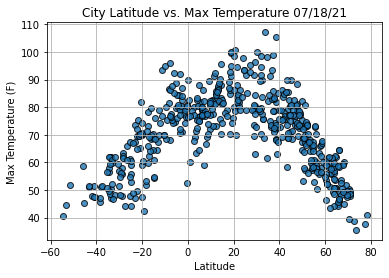

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

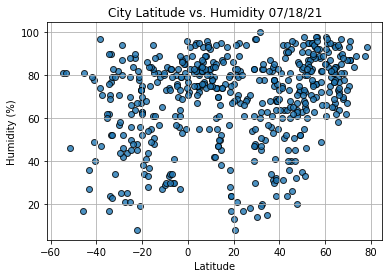

In [36]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

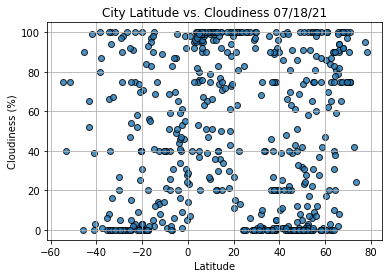

In [37]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

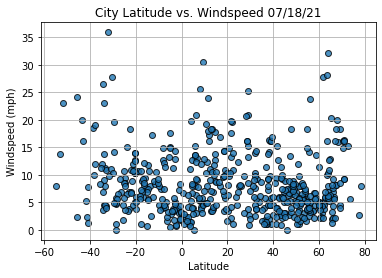

In [38]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed "+ time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [39]:
from scipy.stats import linregress

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# If we run this code there will be no output until we call the function with five parameters.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
#The output will present all the information at index 13 of the city_data_df DataFrame.
index13 = city_data_df.loc[13]
index13

City                      Bubaque
Country                        GW
Date          2021-07-18 20:32:40
Lat                       11.2833
Lng                      -15.8333
Max Temp                    81.21
Humidity                       79
Cloudiness                    100
Wind Speed                   12.3
Name: 13, dtype: object

In [42]:
# We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere 
# latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code 
# city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these 
#criteria.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2021-07-18 20:32:35,78.2186,15.6401,40.84,93,90,8.05
3,Olafsvik,IS,2021-07-18 20:32:36,64.8945,-23.7142,50.83,84,81,12.93
5,Ribeira Grande,PT,2021-07-18 20:32:37,38.5167,-28.7000,72.00,68,75,16.11
9,Uyskoye,RU,2021-07-18 20:32:38,54.3775,60.0047,59.38,95,22,5.86
10,Tasiilaq,GL,2021-07-18 20:32:39,65.6145,-37.6368,44.76,79,79,2.06


In [43]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Port Alfred,ZA,2021-07-18 20:32:35,-33.5906,26.8910,61.95,52,0,11.18
2,Bredasdorp,ZA,2021-07-18 20:32:35,-34.5322,20.0403,56.52,62,8,6.91
4,Ushuaia,AR,2021-07-18 20:32:36,-54.8000,-68.3000,40.66,81,75,8.05
6,Mahebourg,MU,2021-07-18 20:32:37,-20.4081,57.7000,70.25,73,40,10.36
7,Punta Arenas,CL,2021-07-18 20:28:18,-53.1500,-70.9167,44.71,81,40,13.80


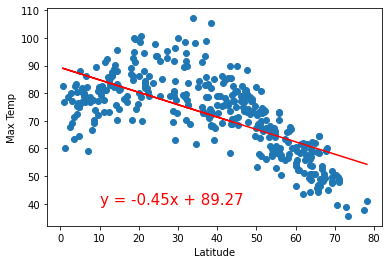

In [44]:
# To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. 
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the 
# northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

# If the equation for the regression line doesn't show up on your graph, you can change the text_coordinates until you see 
# the equation.


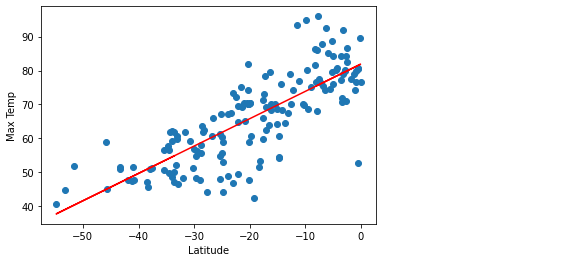

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


In [46]:
# The correlation between the latitude and the maximum temperature is strong to very strong because the 
# r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, 
# as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. 
#And when we are further from the equator the temperatures become cooler. Check the r-values for your plots.


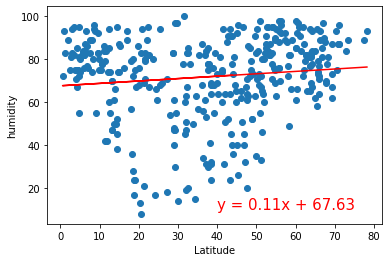

In [47]:
# Linear regression on the Northern Hemisphere - humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', 'humidity',(40,10))


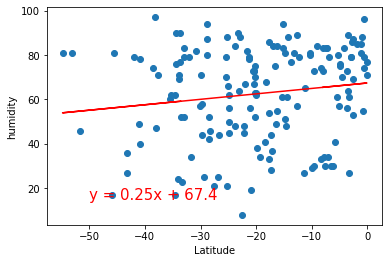

In [48]:
# Linear regression on the Southern Hemisphere - humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', 'humidity',(-50,15))

In [49]:
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for 
# the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable 
# due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 


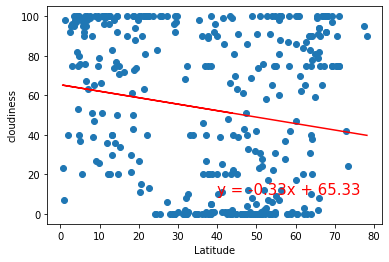

In [50]:
# Linear regression on the Northern Hemisphere - cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'cloudiness',(40,10))

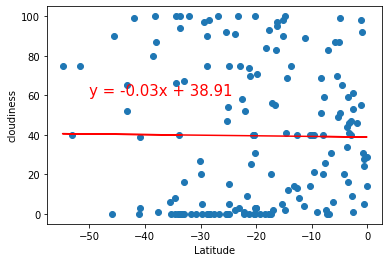

In [51]:
# Linear regression on the Southern Hemisphere - cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', 'cloudiness',(-50,60))

In [52]:
# mine does not look like the exercise
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 
# for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. 
#This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent 
#cloudiness. Check the r-values for your plots.


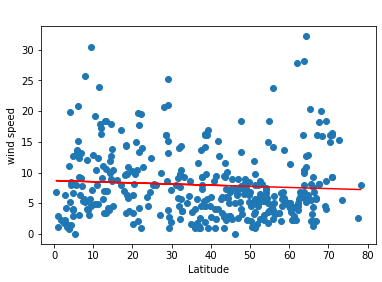

In [53]:
# Linear regression on the Northern Hemisphere - wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'wind speed',(40,35))

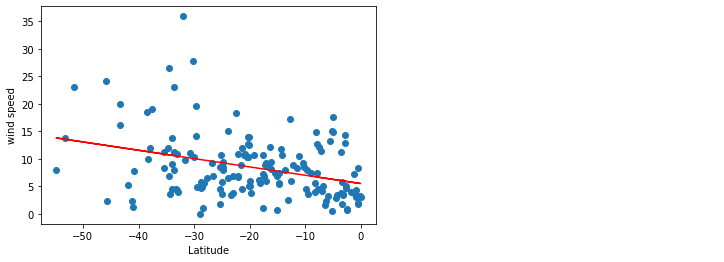

In [54]:
# Linear regression on the Southern Hemisphere - wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'wind speed',(40,35))

In [55]:
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the 
# Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed 
# is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your 
# plots.
